In [1]:
import numpy as np
import matplotlib.pyplot as plt
import msprime
from IPython.display import SVG, display

In [2]:
import tskit

In [3]:
def cross_correlation(X, Y, lim):
    n_comps = X.shape[0] - lim
    xy = np.correlate(X, Y[:-lim], 'valid') / n_comps
    x = np.convolve(X, np.ones(n_comps), 'valid') / n_comps
    y = np.nansum(Y[:-lim]) / n_comps
    return (xy - x*y)

In [4]:
msprime.__version__

'0.7.0'

In [34]:
# n = 100
# r = 2e-8
# r = 2e-6
# mu = 3e-9
# pi = 1e-2
# T_2 = pi / mu
# d_c = 1/(r*T_2)
# num_reps = 100
#locus_length = int(1e3)

In [82]:
n = 50
r = 0
Ne = 1/2
num_reps = int(1e4)
mu = 1
alphas = [1.25, 1.5, 1.75]

In [83]:
np.random.seed(100)
simulations = {}
for alpha in alphas:
    model=msprime.BetaCoalescent(population_size=Ne, alpha=alpha)
    simulations[alpha] = msprime.simulate(
                            mutation_rate=mu,
                            sample_size=n,
                            recombination_rate=r,
                            num_replicates=num_reps,
                            model=model)

In [5]:
import collections

In [6]:
def get_sfs(sample_size, model, num_replicates=1000):
    branch_lengths = np.zeros((num_replicates, sample_size-1))
    
    reps = msprime.simulate(sample_size, num_replicates=num_replicates, model=model)

    data = collections.defaultdict(list)
    tbl_sum = [0] * (sample_size - 1)
    for j, ts in enumerate(reps):
        for tree in ts.trees():
            tot_bl = 0.0
            tbl = [0] * (sample_size - 1)
            for node in tree.nodes():
                if tree.parent(node) != msprime.NULL_NODE:
                    tbl[tree.num_samples(node)-1] = tbl[
                        tree.num_samples(node)-1] + tree.branch_length(node)
#                     tot_bl = tot_bl + tree.branch_length(node)

        branch_lengths[j] = tbl
    return branch_lengths
#             for xi in range(sample_size - 1):
#                 rescaled_x = tbl[xi]/tot_bl
#                 data["total_branch_length"].append(rescaled_x)
#                 tbl_sum[xi] = tbl_sum[xi] + rescaled_x
#             data["num_leaves"].extend(range(1, sample_size))
#     return np.array(tbl_sum) / num_replicates

## Trees

2.0 0


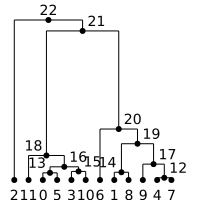

2.0 1


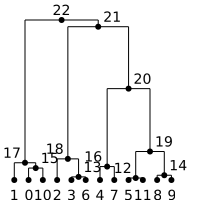

2.0 2


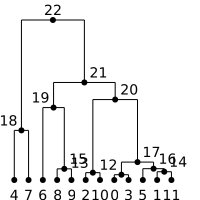

2.0 3


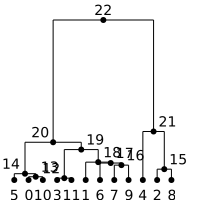

2.0 4


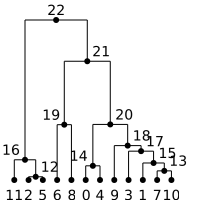

1.5 0


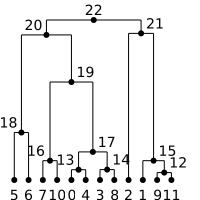

1.5 1


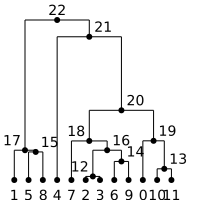

1.5 2


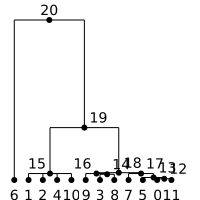

1.5 3


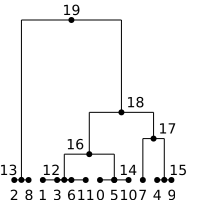

1.5 4


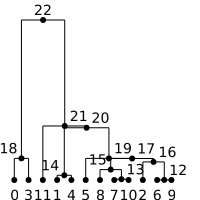

1.0 0


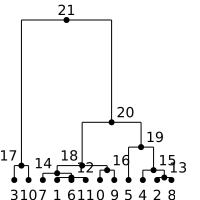

1.0 1


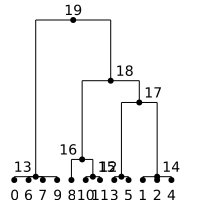

1.0 2


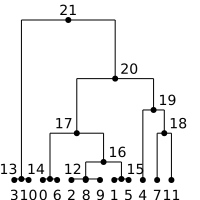

1.0 3


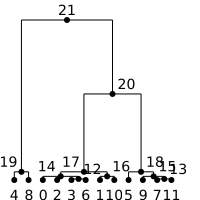

1.0 4


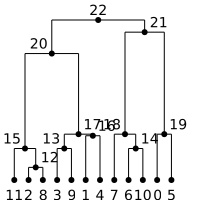

In [26]:
sample_size = 12
num_replicates = 5
alphas = [2.0, 1.5, 1.0]

np.random.seed(100)
for alpha in alphas:
    if alpha == 2.0:
        model=msprime.StandardCoalescent()
    else:
        model=msprime.BetaCoalescent(alpha=alpha)
    reps = msprime.simulate(sample_size, num_replicates=num_replicates, model=model)
    for i, rep in enumerate(reps):
        print(alpha, i)
        display(SVG(next(rep.trees()).draw()))
        

0.01 1e-06 0


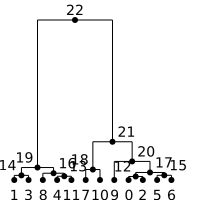

0.01 1e-06 1


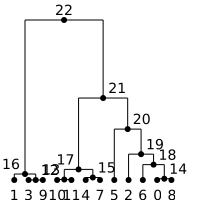

0.01 1e-06 2


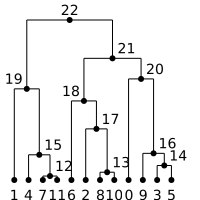

0.01 1e-06 3


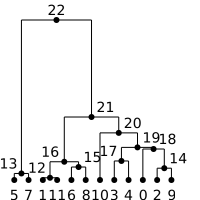

0.01 1e-06 4


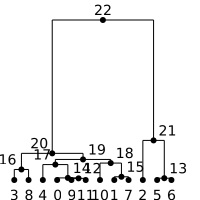

0.01 1.0 0


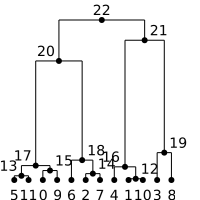

0.01 1.0 1


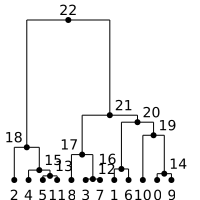

0.01 1.0 2


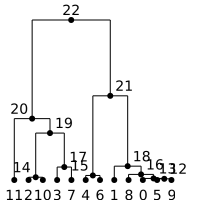

0.01 1.0 3


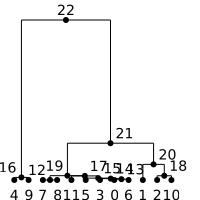

0.01 1.0 4


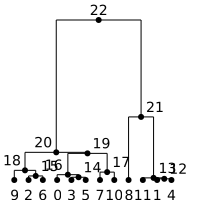

0.01 100.0 0


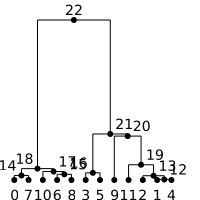

0.01 100.0 1


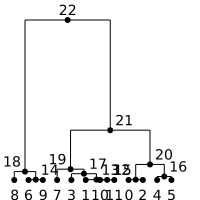

0.01 100.0 2


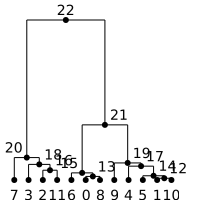

0.01 100.0 3


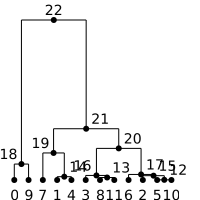

0.01 100.0 4


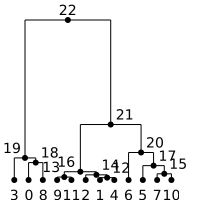

0.5 1e-06 0


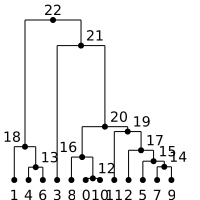

0.5 1e-06 1


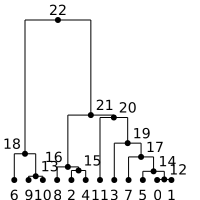

0.5 1e-06 2


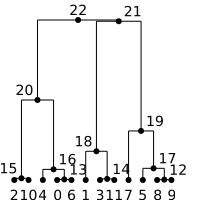

0.5 1e-06 3


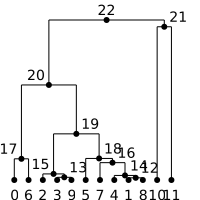

0.5 1e-06 4


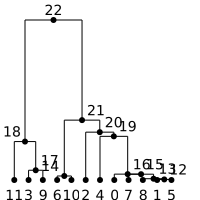

0.5 1.0 0


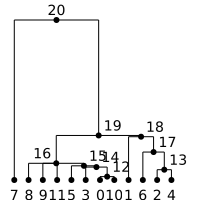

0.5 1.0 1


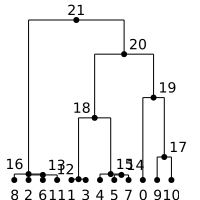

0.5 1.0 2


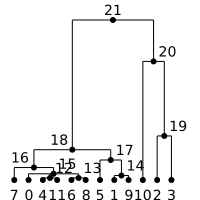

0.5 1.0 3


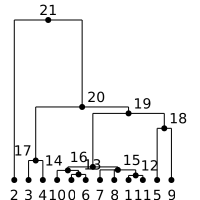

0.5 1.0 4


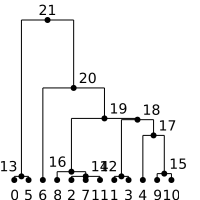

0.5 100.0 0


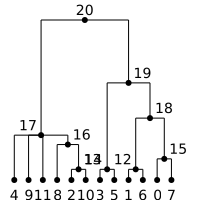

0.5 100.0 1


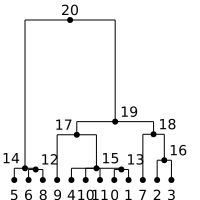

0.5 100.0 2


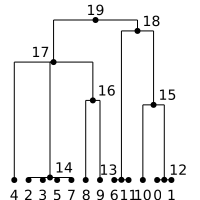

0.5 100.0 3


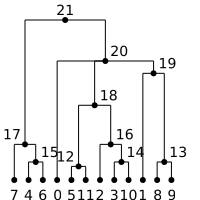

0.5 100.0 4


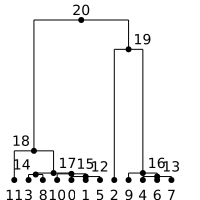

0.99 1e-06 0


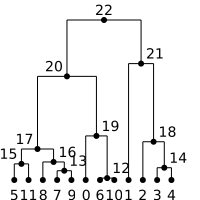

0.99 1e-06 1


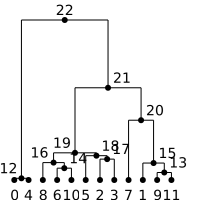

0.99 1e-06 2


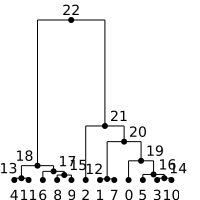

0.99 1e-06 3


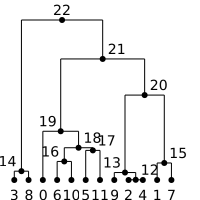

0.99 1e-06 4


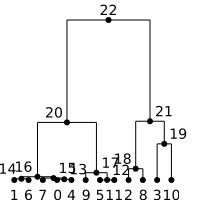

0.99 1.0 0


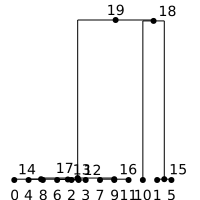

0.99 1.0 1


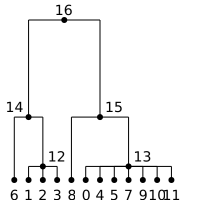

0.99 1.0 2


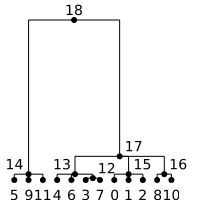

0.99 1.0 3


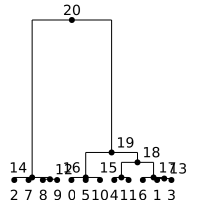

0.99 1.0 4


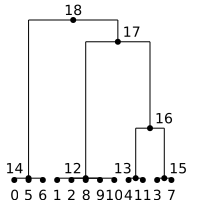

0.99 100.0 0


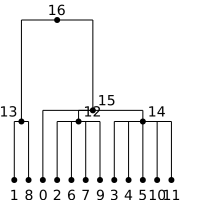

0.99 100.0 1


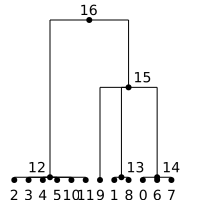

0.99 100.0 2


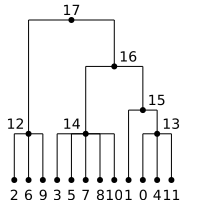

0.99 100.0 3


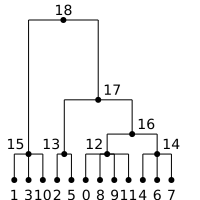

0.99 100.0 4


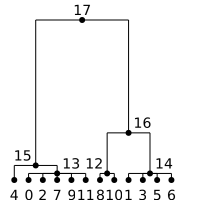

In [27]:
sample_size = 12
num_replicates = 5
psi_list = [0.01, 0.5, 0.99]
c_list = [1e-6, 1.0, 1e2]
N = 10

np.random.seed(100)

for psi in psi_list:
    for c in c_list:
        model=msprime.DiracCoalescent(N, psi, c)
        reps = msprime.simulate(sample_size, num_replicates=num_replicates, model=model)
        for i, rep in enumerate(reps):
            print(psi, c, i)
            display(SVG(next(rep.trees()).draw()))
        

## Site Frequency Spectra

In [7]:
alphas = [2.0, 1.5, 1.0]
sfs_beta = {}
sample_size = 100
for alpha in alphas:
    if alpha == 2.0:
        model=msprime.StandardCoalescent()
    else:
        model=msprime.BetaCoalescent(alpha=alpha, truncation_point=1000)
    sfs_beta[alpha] = get_sfs(sample_size, model, num_replicates=10000)

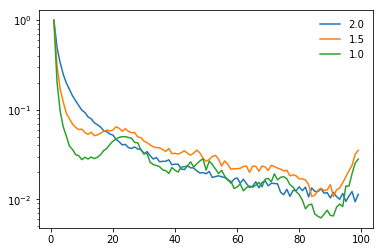

In [11]:
for alpha in alphas:
    sfs_avg = np.mean(sfs_beta[alpha], axis=0)
    plt.semilogy(np.arange(1,sample_size), sfs_avg/sfs_avg[0], label=alpha)
plt.legend()

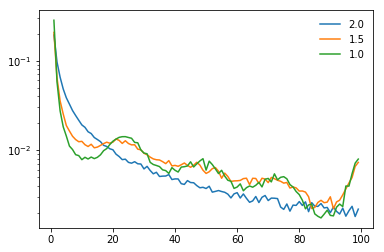

In [10]:
for alpha in alphas:
    sfs_avg = np.mean(sfs_beta[alpha], axis=0)
    plt.semilogy(np.arange(1,sample_size), sfs_avg/np.sum(sfs_avg), label=alpha)
plt.legend()

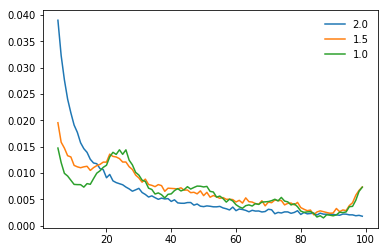

In [144]:
for alpha in alphas:
    sfs_avg = np.mean(sfs_beta[alpha], axis=0)
    plt.plot(np.arange(5,sample_size), sfs_avg[4:]/np.sum(sfs_avg), label=alpha)
plt.legend()

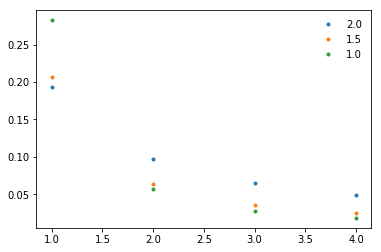

In [148]:
for alpha in alphas:
    sfs_avg = np.mean(sfs_beta[alpha], axis=0)
    plt.plot(np.arange(1,5), sfs_avg[:4]/np.sum(sfs_avg), '.', label=alpha)
plt.legend()

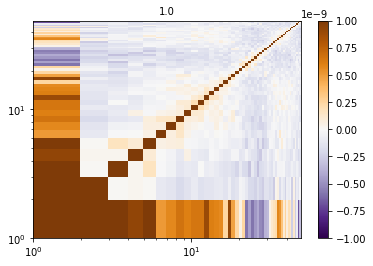

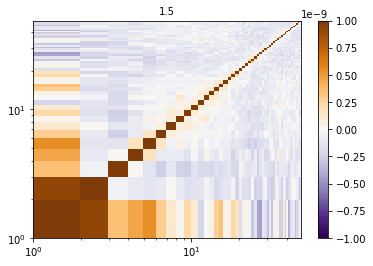

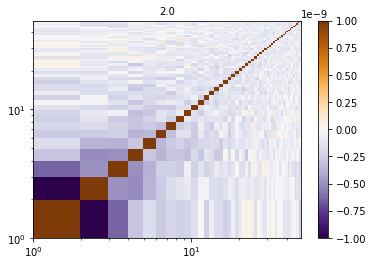

In [183]:
for alpha in [1.0, 1.5, 2.0]:
    sfs_fold = sfs_beta[alpha] + sfs_beta[alpha][:,::-1]
    C = np.cov(sfs_fold.T)
    plt.pcolormesh(np.arange(1,sample_size//2), np.arange(1,sample_size//2), C[:sample_size//2-1,:sample_size//2-1],
                   vmin=-1e-9, vmax=1e-9, cmap='PuOr_r')
    plt.colorbar()
    plt.xscale('log')
    plt.yscale('log')
    plt.title(alpha)
    plt.show()

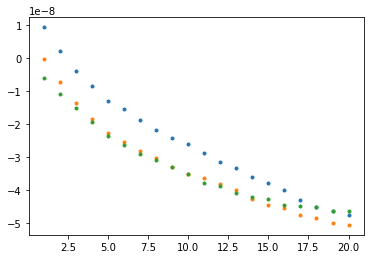

In [195]:
cutoffs = np.arange(1, 21)
for i, alpha in enumerate([1.0, 1.5, 2.0]):
    sfs_fold = (sfs_beta[alpha] + sfs_beta[alpha][:,::-1])[:,:sample_size//2]
    if sample_size % 2 == 0:
        sfs_fold[:,-1] /= 2
    for cutoff in cutoffs:
        C = np.cov(np.sum(sfs_fold[:,:cutoff],axis=1), np.sum(sfs_fold[:,cutoff:],axis=1))
        #print(C.shape)
        plt.plot(cutoff, C[0,1], '.', c='C{}'.format(i))
    

In [29]:
sample_size = 100
psi_list = [0.01, 0.5, 0.99]
c_list = [1e-6, 1.0, 1e2]
sfs_dirac = {}
N = 10

for psi in psi_list:
    for c in c_list:
        params = (psi, c)
        model = msprime.DiracCoalescent(N, psi, c)
        sfs_dirac[params] = get_sfs(sample_size, model, num_replicates=10000)

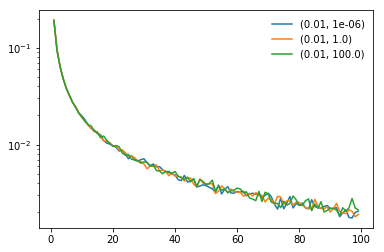

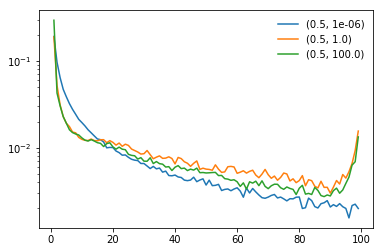

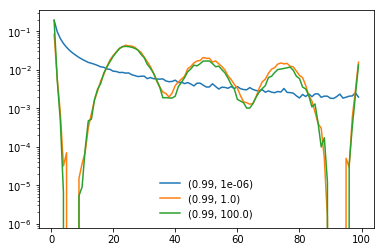

In [205]:
for psi in psi_list:
    for c in c_list:
        sfs_avg = np.mean(sfs_dirac[(psi,c)], axis=0)
        plt.semilogy(np.arange(1,sample_size), sfs_avg/np.sum(sfs_avg), label=(psi,c))
    plt.legend()
    plt.show()

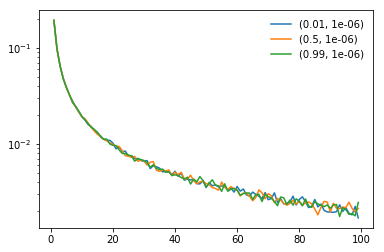

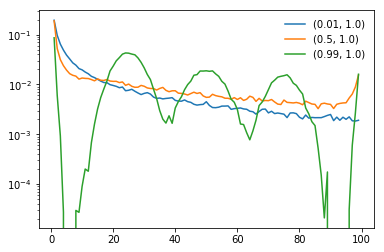

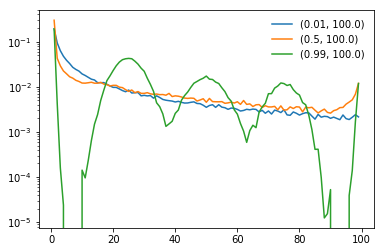

In [30]:
for c in c_list:
    for psi in psi_list:
        sfs_avg = np.mean(sfs_dirac[(psi,c)], axis=0)
        plt.semilogy(np.arange(1,sample_size), sfs_avg/np.sum(sfs_avg), label=(psi,c))
    plt.legend()
    plt.show()

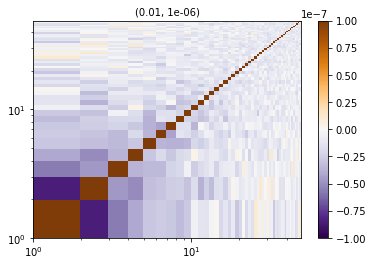

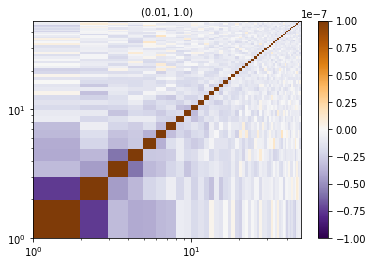

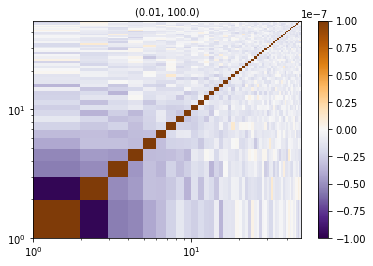

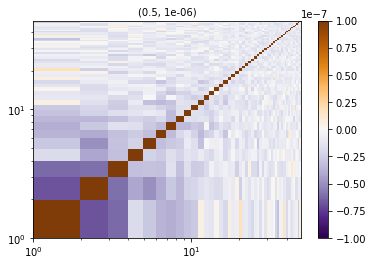

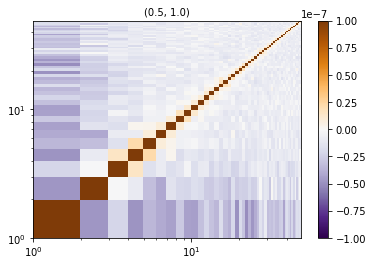

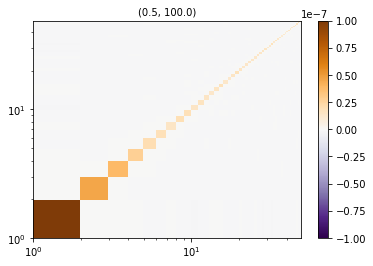

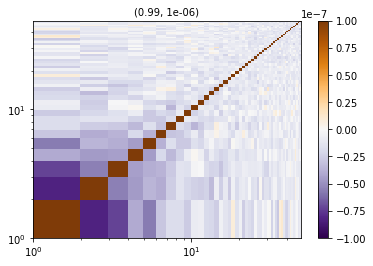

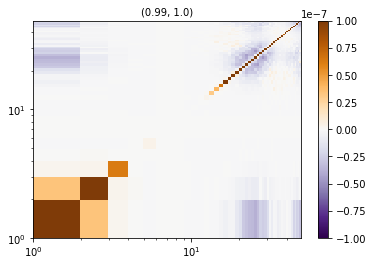

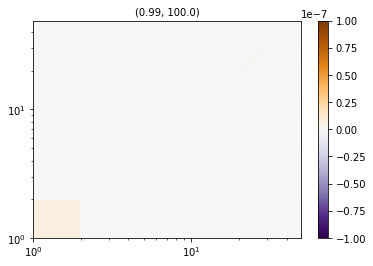

In [206]:
for psi in psi_list:
    for c in c_list:
        sfs_fold = sfs_dirac[(psi,c)] + sfs_dirac[(psi,c)][:,::-1]
        C = np.cov(sfs_fold.T)
        plt.pcolormesh(np.arange(1,sample_size//2), np.arange(1,sample_size//2), C[:sample_size//2-1,:sample_size//2-1],
                        vmin=-1e-7, vmax=1e-7, cmap='PuOr_r')
        plt.colorbar()
        plt.xscale('log')
        plt.yscale('log')
        plt.title((psi,c))
        plt.show()